In [1]:
%cd ..
%ls

/Users/ariskoutris/Software/miniconda3/envs/fball-analytics/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/ariskoutris/Documents/AS24/Data Science Lab/dsl-hs-2024/src
__pycache__/           pass_options.py        responsibility.ipynb*
networks.py            pass_tables.py         skillcorner_parser.py
notebooks/             resp.py                utils.py


In [2]:
from pass_options import attacker_options
import pandas as pd

In [3]:
WYSCOUT_ID = 5414111
SKILLCORNER_ID = 952209


DATA_PATH = f'../data/networks/match_{SKILLCORNER_ID}/'
PASSES_DF_PATH = DATA_PATH + 'passes_df.csv'

DATA_PATH_PASSES = f'../data/'
XT_PLOT_PATH = DATA_PATH_PASSES + 'smoothed_xt.csv'


In [4]:
passes_df = pd.read_csv(PASSES_DF_PATH)
passes_df.head(5)

,frame,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,...,endLocation.x_original,endLocation.y_original,tracking.is_self,tracking.is_teammate,responsibility,possible_interception_point,interception_point_x,interception_point_y,interception_xt,threat_by_pressing
0,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,...,42,83,False,False,0.0,[-0.71441405 0.7812702 ],-0.714414,0.78127,0.00826,0.0
1,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,...,42,83,False,False,0.0,[-1.05882353 0. ],-1.058824,0.00000,0.00826,0.0
2,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,...,42,83,False,False,0.0,[-1.05882353 0. ],-1.058824,0.00000,0.00826,0.0
3,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,...,42,83,False,False,0.0,[-1.05882353 0. ],-1.058824,0.00000,0.00826,0.0
4,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,...,42,83,False,False,0.0,[-1.05882353 0. ],-1.058824,0.00000,0.00826,0.0


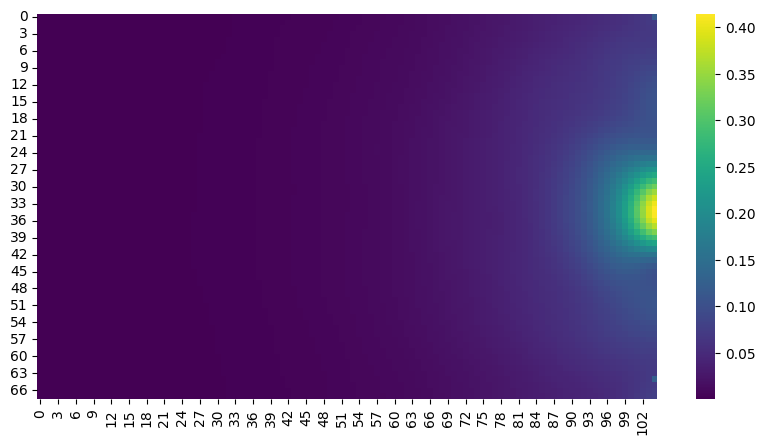

In [5]:
# load xt table
xt_table = pd.read_csv(XT_PLOT_PATH)

cell_width = 100 / xt_table.shape[1]
cell_height = 100 / xt_table.shape[0]

# prepare with pitch_dict, outside the function
pitch_length = 105
pitch_width = 68
xt_rows, xt_cols = 68, 105
cell_width = pitch_length / xt_cols
cell_height = pitch_width / xt_rows

pitch_dict = {
    'pitch_length': pitch_length,
    'pitch_width': pitch_width,
    'xt_rows': xt_rows,
    'xt_cols': xt_cols,
    'cell_width': cell_width,
    'cell_height': cell_height,
    'xt_table': xt_table
}

# plot xt_table
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(xt_table, cmap='viridis', ax=ax)
plt.show()


In [6]:
attacker_options(passes_df, 39, pitch_dict)

/Users/ariskoutris/Documents/AS24/Data Science Lab/dsl-hs-2024/src/pass_options.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['potential_dxt'] = data.apply(calculate_potential_dxt, axis=1, args=(pitch_dict,))


,passer_id,recipient_player_id,recipient_loc_x,recipient_loc_y,expected_dxt
0,7387,4777,40.57,0.23,-0.007784
1,7387,14407,18.81,5.97,-0.005949
2,7387,10738,18.44,-12.58,-0.005876
3,7387,24466,11.61,21.55,-0.004968
4,7387,7863,14.46,-22.88,-0.005567
5,7387,33512,11.06,-4.01,-0.004158
6,7387,7017,11.04,7.53,-0.004188
7,7387,3837,2.86,-8.93,-0.000762
8,7387,10082,0.45,21.52,-0.000160
9,7387,31930,0.35,-18.34,-0.000018
